In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

In [2]:
train_data= pd.read_csv("train_2v.csv")
test_data=pd.read_csv("test_2v.csv")

In [3]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
print("Train_Data Set Shape : {}" .format(train_data.shape))

print("Test_Data Set Shape : {}" .format(test_data.shape))

Train_Data Set Shape : (43400, 12)
Test_Data Set Shape : (18601, 11)


In [6]:
train_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


Data Preprocessing

In [7]:
((train_data.isnull().sum()/len(train_data))*100).sort_values(ascending=False)

smoking_status       30.626728
bmi                   3.368664
stroke                0.000000
avg_glucose_level     0.000000
Residence_type        0.000000
work_type             0.000000
ever_married          0.000000
heart_disease         0.000000
hypertension          0.000000
age                   0.000000
gender                0.000000
id                    0.000000
dtype: float64

In [8]:
((test_data.isnull().sum()/len(test_data))*100).sort_values(ascending=False)

smoking_status       30.917693
bmi                   3.177249
avg_glucose_level     0.000000
Residence_type        0.000000
work_type             0.000000
ever_married          0.000000
heart_disease         0.000000
hypertension          0.000000
age                   0.000000
gender                0.000000
id                    0.000000
dtype: float64

Cleary bioth the data set has missing value for smoking Status and Bmi. Lets join bith the data set 

In [9]:
joined_data=pd.concat([train_data,test_data])

In [10]:
print("joined Data Shape : {}" .format(joined_data.shape))

joined Data Shape : (62001, 12)


In [11]:
joined_data.iloc[-5:-1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
18596,67353,Male,20.0,0,0,No,Private,Rural,74.43,18.4,formerly smoked,NaN
18597,362,Male,61.0,0,0,Yes,Govt_job,Rural,211.55,31.6,smokes,NaN
18598,29839,Female,79.0,0,0,Yes,Private,Rural,125.74,29.4,never smoked,NaN
18599,6438,Male,55.0,0,0,Yes,Govt_job,Rural,69.46,33.8,never smoked,NaN


In [12]:
a=((joined_data.isnull().sum()/len(joined_data))*100).sort_values(ascending=False)

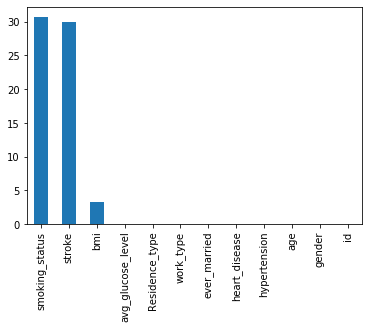

In [13]:
a.plot.bar()
plt.show()

lets impute BMI with its Mean as it has very less missing records

In [14]:
train_data['bmi']=train_data.bmi.fillna(train_data.bmi.mean())

In [15]:
((train_data.isnull().sum()/len(train_data))*100).sort_values(ascending=False)

smoking_status       30.626728
stroke                0.000000
bmi                   0.000000
avg_glucose_level     0.000000
Residence_type        0.000000
work_type             0.000000
ever_married          0.000000
heart_disease         0.000000
hypertension          0.000000
age                   0.000000
gender                0.000000
id                    0.000000
dtype: float64

**Handling Catagorical varriable**

In [16]:
for i in train_data.select_dtypes(exclude=['int','float']).columns:
    print('*******',i,'******') 
    print(train_data[i].value_counts())
    print('*'*30)
    print()

******* gender ******
Female    25665
Male      17724
Other        11
Name: gender, dtype: int64
******************************

******* ever_married ******
Yes    27938
No     15462
Name: ever_married, dtype: int64
******************************

******* work_type ******
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64
******************************

******* Residence_type ******
Urban    21756
Rural    21644
Name: Residence_type, dtype: int64
******************************

******* smoking_status ******
never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64
******************************



Lets get rid off these Catagorical varriables in a way so that our machine can understand these varriables

In [17]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [18]:
train_data_orignal=train_data.copy()
train_data_orignal.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [19]:
train_data['gender']=le.fit_transform(train_data['gender'])
train_data['ever_married'] = le.fit_transform(train_data['ever_married'])
train_data['work_type']= le.fit_transform(train_data['work_type'])
train_data['Residence_type']= le.fit_transform(train_data['Residence_type'])

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  int64  
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  int64  
 6   work_type          43400 non-null  int64  
 7   Residence_type     43400 non-null  int64  
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                43400 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 4.0+ MB


In [21]:
train_data_without_smoke=train_data[train_data.smoking_status.isnull()]

In [22]:
train_data_with_smoke=train_data[train_data.smoking_status.notnull()]

In [23]:
train_data_without_smoke.drop('smoking_status',axis=1,inplace=True)

/home/monad/anaconda3/envs/tff/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
print("Shape of Train Data With Smoked Data: {}".format(train_data_with_smoke.shape))
print("Shape of Train Data Without Smoked Data: {}".format(train_data_without_smoke.shape))

Shape of Train Data With Smoked Data: (30108, 12)
Shape of Train Data Without Smoked Data: (13292, 11)


In [25]:
train_data_without_smoke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,0
5,32257,0,47.0,0,0,1,2,1,210.95,50.1,0
10,10460,0,79.0,0,0,1,0,1,77.08,35.0,0


Lets Encode the Smoking status fro train data 


In [26]:
train_data_with_smoke.smoking_status=le.fit_transform(train_data_with_smoke.smoking_status)

/home/monad/anaconda3/envs/tff/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


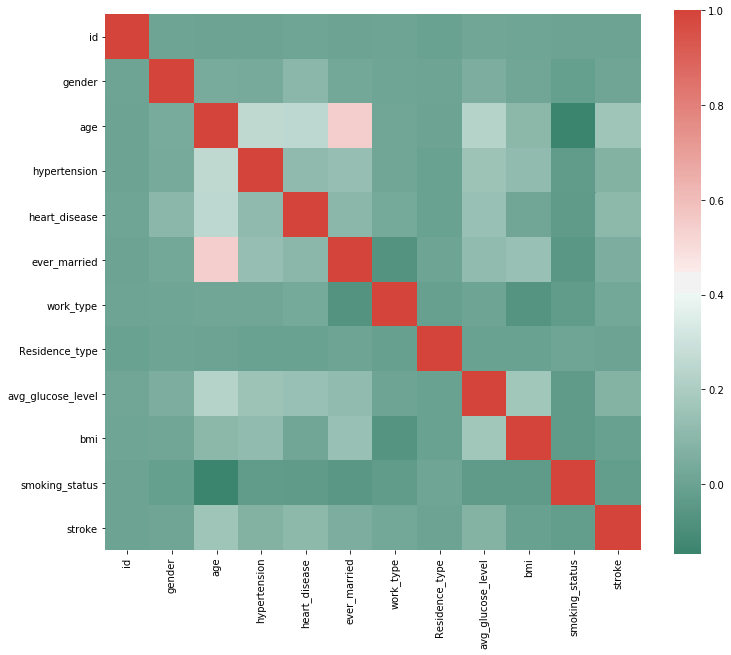

In [27]:
f,ax=plt.subplots(figsize=(12,10))

corr=train_data_with_smoke.corr()

sns.heatmap(train_data_with_smoke.corr(),mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(520,14,as_cmap=True),square=True, ax=ax)

In [28]:
train_data_orignal.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


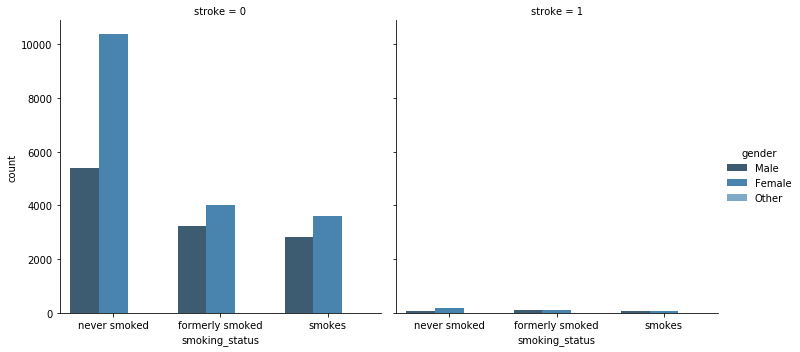

In [29]:
sns.catplot(x='smoking_status',kind='count',col='stroke',hue='gender',data=train_data_orignal,palette="Blues_d")

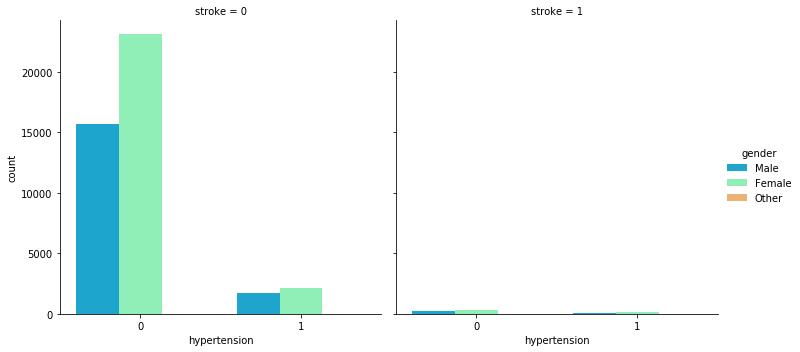

In [30]:
sns.catplot(x='hypertension',kind='count',col='stroke',hue='gender',data=train_data_orignal,palette="rainbow")

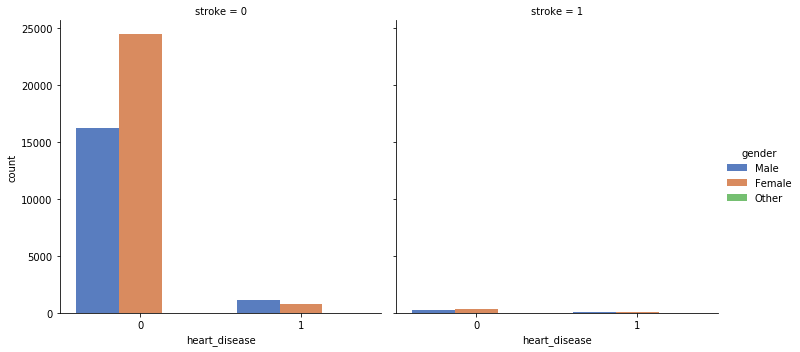

In [31]:
sns.catplot(x='heart_disease',kind='count',col='stroke',hue='gender',data=train_data_orignal,palette="muted")

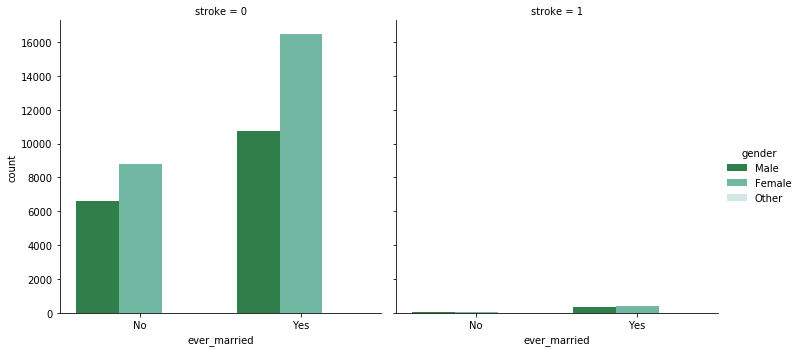

In [32]:
sns.catplot(x='ever_married',kind='count',col='stroke',hue='gender',data=train_data_orignal,palette="BuGn_r")

Handling missing Data

In [33]:
train_data_with_smoke['stroke'].value_counts()

0    29470
1      638
Name: stroke, dtype: int64

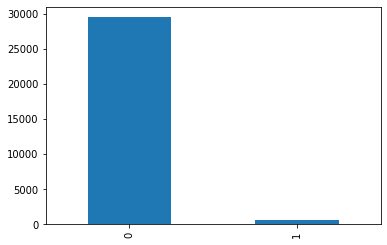

In [34]:
train_data_with_smoke['stroke'].value_counts().plot.bar()

/home/monad/anaconda3/envs/tff/lib/python3.6/site-packages/seaborn/distributions.py:227: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=hist_color, **hist_kws)


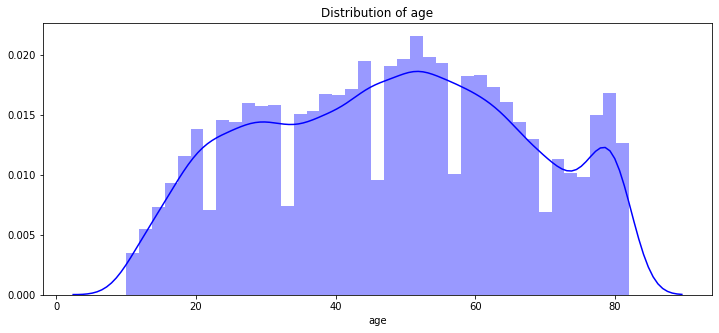

In [35]:
plt.figure(figsize=(12,5))

plt.title("Distribution of age")

sns.distplot(train_data_with_smoke['age'],color='B')

Lets Explore the age varriable

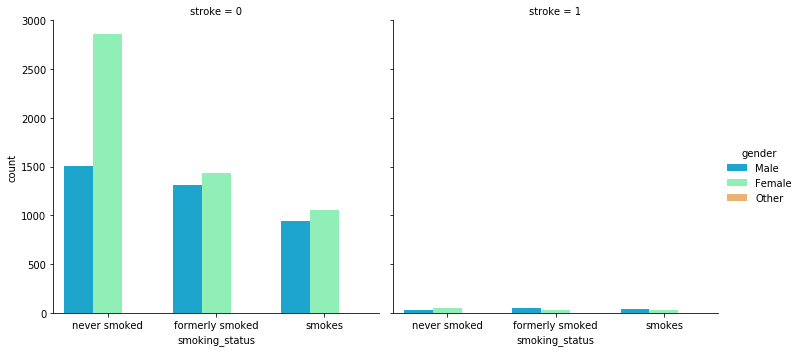

In [36]:
sns.catplot(x='smoking_status',kind='count',col='stroke',data=train_data_orignal[(train_data_orignal['age']>50) & (train_data_orignal['age']<70)],palette='rainbow',hue='gender')

In [37]:
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN

In [38]:
ros=RandomOverSampler(random_state=0)
smote=SMOTE()

In [41]:
x_resampled,y_resampled =ros.fit_sample(train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'],train_data_with_smoke['stroke'])

In [42]:
print("ROS Shape Of Train Data With Smoke(Independent varriable) :   {}".format(x_resampled.shape))
print("ROS Shape Of Train Data With Smoke(dependent varriable) :   {}".format(y_resampled.shape))

ROS Shape Of Train Data With Smoke(Independent varriable) :   (58940, 11)
ROS Shape Of Train Data With Smoke(dependent varriable) :   (58940,)


In [44]:
x_resampled_1,y_resampled_1=ros.fit_sample(train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'],train_data_without_smoke['stroke'])

In [45]:
print("ROS Shape Of Train Data Without Smoke(Independent varriable) :   {}".format(x_resampled_1.shape))
print("ROS Shape Of Train Data Without Smoke(dependent varriable) :   {}".format(y_resampled_1.shape))

ROS Shape Of Train Data Without Smoke(Independent varriable) :   (26294, 10)
ROS Shape Of Train Data Without Smoke(dependent varriable) :   (26294,)


Now Lets Split our Resampled Data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(47152, 11)
(11788, 11)


In [48]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(x_resampled_1,y_resampled_1,test_size=0.2)
print(X_train_1.shape)
print(X_test_1.shape)

(21035, 10)
(5259, 10)


# Lets Create Our Model.{Decision Tree Classifier }

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc,roc_auc_score,precision_score,recall_score,roc_curve

In [50]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred=dtree.predict(X_test)

In [51]:
print(classification_report(y_test,pred))
print('**'*40)

print("Accuracy Score : {} ".format(accuracy_score(y_test,pred)))
print('**'*40)

print("Confusion Matrix : {} ".format(confusion_matrix(y_test,pred)))
print('**'*40)


print("Precision Score : {} ".format(precision_score(y_test,pred)))
print('**'*40)


print("Recall Score : {} ".format(recall_score(y_test,pred)))
print('**'*40)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5946
           1       0.98      1.00      0.99      5842

   micro avg       0.99      0.99      0.99     11788
   macro avg       0.99      0.99      0.99     11788
weighted avg       0.99      0.99      0.99     11788

********************************************************************************
Accuracy Score : 0.9875296912114014 
********************************************************************************
Confusion Matrix : [[5799  147]
 [   0 5842]] 
********************************************************************************
Precision Score : 0.9754550008348639 
********************************************************************************
Recall Score : 1.0 
********************************************************************************


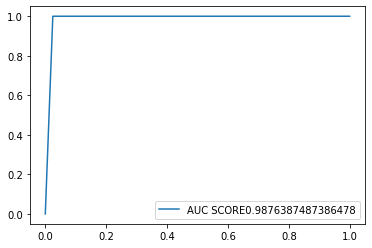

In [52]:

y_pred_prob=dtree.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,y_pred_prob)
auc=roc_auc_score(y_test,y_pred_prob)

plt.plot(fpr,tpr,label="AUC SCORE"+str(auc))
plt.legend(loc=4)
plt.show()


In [53]:
#Lets Checkout The Importance Fetature 

Imp_Feature=pd.DataFrame(dtree.feature_importances_ ,index=train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print(Imp_Feature)

                   Importance
age                  0.367110
avg_glucose_level    0.198316
id                   0.162806
bmi                  0.148656
smoking_status       0.027985
work_type            0.026317
heart_disease        0.018189
gender               0.015230
hypertension         0.012435
Residence_type       0.011633
ever_married         0.011323


In [54]:
Imp_Feature.values

array([[0.36711018],
       [0.19831582],
       [0.16280628],
       [0.14865552],
       [0.02798531],
       [0.02631655],
       [0.01818889],
       [0.01523018],
       [0.01243469],
       [0.01163312],
       [0.01132347]])

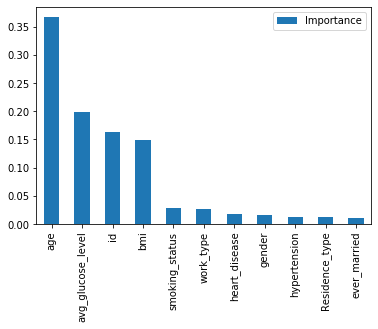

In [55]:
Imp_Feature.plot(kind='bar')

 Dtree Without Smoking Status111

In [56]:
dtree1=DecisionTreeClassifier()
dtree1.fit(X_train_1,y_train_1)
pred1=dtree1.predict(X_test_1)

In [57]:
print(classification_report(y_test_1,pred1))
print('**'*40)

print("Accuracy Score : {} ".format(accuracy_score(y_test_1,pred1)))
print('**'*40)

print("Confusion Matrix : {} ".format(confusion_matrix(y_test_1,pred1)))
print('**'*40)


print("Precision Score : {} ".format(precision_score(y_test_1,pred1)))
print('**'*40)


print("Recall Score : {} ".format(recall_score(y_test_1,pred1)))
print('**'*40)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2661
           1       0.98      1.00      0.99      2598

   micro avg       0.99      0.99      0.99      5259
   macro avg       0.99      0.99      0.99      5259
weighted avg       0.99      0.99      0.99      5259

********************************************************************************
Accuracy Score : 0.9923939912530899 
********************************************************************************
Confusion Matrix : [[2621   40]
 [   0 2598]] 
********************************************************************************
Precision Score : 0.9848369977255497 
********************************************************************************
Recall Score : 1.0 
********************************************************************************


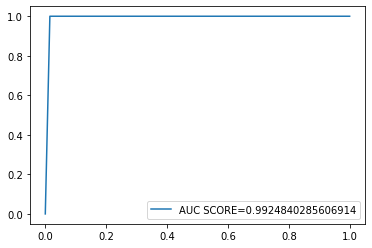

In [58]:
y_pred_prob_1=dtree1.predict_proba(X_test_1)[::,1]

fpr, tpr, _ = roc_curve(y_test_1,y_pred_prob_1)
auc=roc_auc_score(y_test_1,y_pred_prob_1)

plt.plot(fpr,tpr,label="AUC SCORE="+str(auc))
plt.legend(loc=4)
plt.show()

# Now Lets Predict on our Test Data

In [59]:
test_data.bmi=test_data.bmi.fillna(test_data.bmi.mean())

In [60]:
((test_data.isnull().sum()/len(test_data))*100).sort_values(ascending=False)

smoking_status       30.917693
bmi                   0.000000
avg_glucose_level     0.000000
Residence_type        0.000000
work_type             0.000000
ever_married          0.000000
heart_disease         0.000000
hypertension          0.000000
age                   0.000000
gender                0.000000
id                    0.000000
dtype: float64

# Transformation Of Test Data

In [61]:
test_data['gender'] = le.fit_transform(test_data['gender'])
test_data['ever_married'] = le.fit_transform(test_data['ever_married'])
test_data['work_type']= le.fit_transform(test_data['work_type'])
test_data['Residence_type']= le.fit_transform(test_data['Residence_type'])

In [62]:
test_data.drop(axis=1,columns=['smoking_status'],inplace=True)

In [63]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18601 entries, 0 to 18600
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 18601 non-null  int64  
 1   gender             18601 non-null  int64  
 2   age                18601 non-null  float64
 3   hypertension       18601 non-null  int64  
 4   heart_disease      18601 non-null  int64  
 5   ever_married       18601 non-null  int64  
 6   work_type          18601 non-null  int64  
 7   Residence_type     18601 non-null  int64  
 8   avg_glucose_level  18601 non-null  float64
 9   bmi                18601 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 1.4 MB


In [64]:
final_data=dtree1.predict(test_data)

In [65]:
Result_df=pd.DataFrame(final_data,columns=['Pred'])

In [66]:
Result_df['Pred'].value_counts()

0    18297
1      304
Name: Pred, dtype: int64